# Principle component analysis (PCA)
author: Parin Chaipunya
affil: KMUTT

## Understanding PCA

Let us first walk through a visualizable example of PCA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Step 1: Generate and center data
np.random.seed(1)
n_points = 300
mean_3d = np.array([0, 0, 0])
cov_3d = np.array([[3, 2.5, 2],
                   [2.5, 3, 2.5],
                   [2, 2.5, 3]])
data_3d = np.random.multivariate_normal(mean_3d, cov_3d, n_points)
centered_data = data_3d - np.mean(data_3d, axis=0)

# Step 2: PCA
cov_matrix = np.cov(centered_data, rowvar=False)
eigvals, eigvecs = np.linalg.eigh(cov_matrix)
sorted_idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_idx]
eigvecs = eigvecs[:, sorted_idx]

# Normalize PC1 and PC2
pcs = eigvecs[:, :2]
pcs_normalized = pcs / np.linalg.norm(pcs, axis=0)
projected_data = centered_data @ pcs_normalized

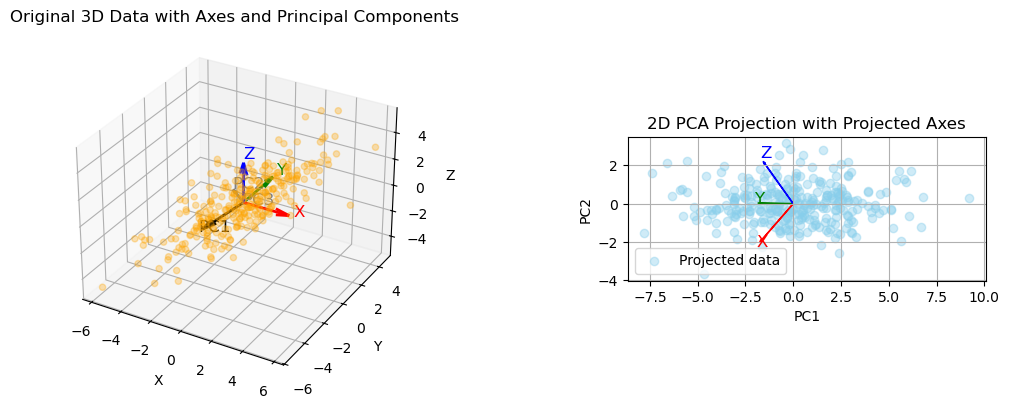

In [3]:
# Step 3: Plotting
fig = plt.figure(figsize=(12, 6))
ax3d = fig.add_subplot(1, 2, 1, projection='3d')
ax2d = fig.add_subplot(1, 2, 2)

# Original features and colors
features = ['X', 'Y', 'Z']
colors = ['red', 'green', 'blue']

# Plot centered 3D data
ax3d.scatter(centered_data[:, 0], centered_data[:, 1], centered_data[:, 2], alpha=0.3, color="orange")

# Plot original coordinate axes (X, Y, Z)
for i in range(3):
    ax3d.quiver(0, 0, 0, *np.eye(3)[i], color=colors[i], length=3, linewidth=2)
    ax3d.text(*(np.eye(3)[i] * 3.3), features[i], color=colors[i], fontsize=12)

# Plot principal components (PC1, PC2, PC3)
for i in range(3):
    vec = eigvecs[:, i] * np.sqrt(eigvals[i])
    ax3d.quiver(0, 0, 0, *vec, color='black' if i == 0 else 'gray', linewidth=2)
    ax3d.text(*(vec * 1.1), f'PC{i+1}', color='black' if i == 0 else 'gray', fontsize=12)

ax3d.set_title("Original 3D Data with Axes and Principal Components")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Plot 2D projection of data
ax2d.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.4, color='skyblue', label='Projected data')

# Plot projections of X, Y, Z axes onto PC1-PC2 plane
for i in range(3):
    loading = pcs_normalized[i] * 3
    ax2d.arrow(0, 0, loading[0], loading[1], color=colors[i],
               width=0.02, head_width=0.1, length_includes_head=True)
    ax2d.text(loading[0]*1.1, loading[1]*1.1, features[i], color=colors[i], fontsize=12)

ax2d.set_xlabel("PC1")
ax2d.set_ylabel("PC2")
ax2d.set_title("2D PCA Projection with Projected Axes")
ax2d.grid(True)
ax2d.set_aspect('equal')
ax2d.legend()

# Add space between the plots
plt.subplots_adjust(wspace=0.6)
plt.savefig("pca.png")
plt.show()

## A sample usage pipeline (raw data -> PCA -> regression)

We showcase here the PCA in action and the full pipeline from the datasheet, to PCA, and finally to linear regression.

In [4]:
import pandas as pd

We start with importing the data from the excel file as `dataframe`.

In [5]:
file_poly = "data/glucose_polynomial_deg2.xlsx"

# Load sheets
df_glucose_orig = pd.read_excel(file_poly, sheet_name="data")
df_poly = pd.read_excel(file_poly, sheet_name="poly_deg2")
df_dict_poly = pd.read_excel(file_poly, sheet_name="data_dictionary")

print("Original data shape:", df_glucose_orig.shape)
print("Polynomial features shape:", df_poly.shape)

# Preview
display(df_glucose_orig.head())
display(df_poly.head())

Original data shape: (1000, 11)
Polynomial features shape: (1000, 65)


,age_yrs,bmi_kg_m2,fasting_insulin_uU_mL,activity_min_per_day,sleep_hours,stress_level_1to10,carbs_g,fiber_g,time_since_meal_min,med_intensity_0to1,glucose_mg_dL
0,42.216694,27.075168,13.352732,22.020224,6.555261,3.653035,58.622372,6.021339,39.728039,0.189020,97.264462
1,48.357972,28.715150,13.219004,42.416666,6.268298,6.127918,66.902478,6.764806,65.599227,0.295915,127.003029
2,40.422699,23.565523,10.051025,50.287428,5.074159,4.169189,52.434209,3.970720,27.867131,0.479406,80.986929
3,20.355158,22.992836,5.230674,59.129151,6.761241,2.529746,29.133812,14.946555,73.424813,0.250804,60.000000
4,42.528710,23.014632,6.440158,48.560201,7.324171,3.783913,85.753183,7.865270,52.457128,0.536410,123.588332


,age_yrs,bmi_kg_m2,fasting_insulin_uU_mL,activity_min_per_day,sleep_hours,stress_level_1to10,carbs_g,fiber_g,time_since_meal_min,med_intensity_0to1,...,carbs_g^2,carbs_g*fiber_g,carbs_g*time_since_meal_min,carbs_g*med_intensity_0to1,fiber_g^2,fiber_g*time_since_meal_min,fiber_g*med_intensity_0to1,time_since_meal_min^2,time_since_meal_min*med_intensity_0to1,med_intensity_0to1^2
0,42.216694,27.075168,13.352732,22.020224,6.555261,3.653035,58.622372,6.021339,39.728039,0.189020,...,3436.582557,352.985167,2328.951929,11.080792,36.256521,239.215986,1.138153,1578.317121,7.509388,0.035729
1,48.357972,28.715150,13.219004,42.416666,6.268298,6.127918,66.902478,6.764806,65.599227,0.295915,...,4475.941517,452.582300,4388.750798,19.797450,45.762604,443.766059,2.001808,4303.258543,19.411799,0.087566
2,40.422699,23.565523,10.051025,50.287428,5.074159,4.169189,52.434209,3.970720,27.867131,0.479406,...,2749.346285,208.201537,1461.190966,25.137283,15.766613,110.652560,1.903587,776.576981,13.359674,0.229830
3,20.355158,22.992836,5.230674,59.129151,6.761241,2.529746,29.133812,14.946555,73.424813,0.250804,...,848.779017,435.450138,2139.144723,7.306885,223.399518,1097.448037,3.748660,5391.203195,18.415257,0.062903
4,42.528710,23.014632,6.440158,48.560201,7.324171,3.783913,85.753183,7.865270,52.457128,0.536410,...,7353.608375,674.471960,4498.365709,45.998837,61.862476,412.589491,4.219007,2751.750300,28.138511,0.287735


Next, we transform them into numpy arrays for calculations.

In [6]:
X_raw = df_poly.to_numpy()
y_raw = df_glucose_orig["glucose_mg_dL"].to_numpy()
print(f"X.shape = {X_raw.shape}")
print(f"y.shape = {y_raw.shape}")

X.shape = (1000, 65)
y.shape = (1000,)


In [7]:
# Take only 500 samples and keep some for testing later.
X = X_raw[:500,:]
y = y_raw[:500]

Before we go further, we shall standardize our feature matrix $X$.

In [8]:
# Standardization (manual version)
X_mean = X.mean(axis=0, keepdims=True)
X_std = X.std(axis=0, ddof=0, keepdims=True)
X_std[X_std == 0] = 1.0   # Avoid division by zero if any feature is constant

X_scaled = (X - X_mean) / X_std

# Double check that we have the correctly scaled data
print("X_scaled shape:", X_scaled.shape)
print("Mean (approx 0):", np.round(X_scaled.mean(axis=0)[:5], 3))
print("Std (approx 1):", np.round(X_scaled.std(axis=0)[:5], 3))

X_scaled shape: (500, 65)
Mean (approx 0): [-0.  0. -0. -0.  0.]
Std (approx 1): [1. 1. 1. 1. 1.]


In [9]:
# === Step 1: Use the standardized glucose data ===
# We already have: X_scaled (standardized features)
centered_data = X_scaled - np.mean(X_scaled, axis=0)

print("Centered data shape:", centered_data.shape)

# === Step 2: PCA computation ===
cov_matrix = np.cov(centered_data, rowvar=False)

# Eigen-decomposition of covariance matrix
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# Sort eigenvalues/eigenvectors descending by eigenvalue magnitude
sorted_idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_idx]
eigvecs = eigvecs[:, sorted_idx]

# === Step 3: Select number of components (for example, 10) ===
pcs = eigvecs[:, :10]  # first 10 principal components

# Normalize for clarity (optional, not necessary for PCA correctness)
pcs_normalized = pcs / np.linalg.norm(pcs, axis=0)

# === Step 4: Project data into principal component space ===
projected_data = centered_data @ pcs_normalized

print("Projected data shape:", projected_data.shape)

Centered data shape: (500, 65)
Projected data shape: (500, 10)


In [10]:
# Compute variance ratio for each principal component
explained_var_ratio = eigvals / np.sum(eigvals)
cumulative_var_ratio = np.cumsum(explained_var_ratio)

print("Explained variance (first 5 PCs):", np.round(explained_var_ratio[:10], 4))
print("Cumulative variance (first 5 PCs):", np.round(cumulative_var_ratio[:10], 4))

Explained variance (first 5 PCs): [0.2815 0.2663 0.1135 0.0982 0.0484 0.0413 0.0356 0.0291 0.0282 0.0156]
Cumulative variance (first 5 PCs): [0.2815 0.5478 0.6613 0.7595 0.8078 0.8492 0.8847 0.9138 0.9421 0.9576]


We finished the PCA steps here.
We shall proceed to linear regression that takes the inputs from the projected data and predicts the sugar level.

In [11]:
A = np.hstack((projected_data, np.ones((projected_data.shape[0],1))))

In [12]:
u = np.linalg.solve(A.T@A, A.T@y)
print(u)
print(u.shape)

[  2.83111665  -4.40884362   9.6831363    2.13254743   0.65061306
  -0.40530557  -0.47047979   2.55893278  -2.75222048  -0.57166465
 102.89402768]
(11,)


Next, we write two prediction functions.
The first one is for the data that has been reduced through the same PCA process.
The second one is for the fully featured raw data.

In [13]:
prediction_reduced = lambda x_reduced_aug: np.dot(x_reduced_aug, u)

In [14]:
def prediction(x_full):
    """
    The input x_full should be of the full 65 features.
    The datatype of x_full should be ndarray, and shape = (65,).
    """
    x_new_centered = (x_full - X_mean) / X_std
    x_new_pca = (x_new_centered @ pcs).reshape(-1,)
    x_new_aug = np.hstack( (x_new_pca, 1) )
    y_pred = prediction_reduced(x_new_aug)
    return y_pred

Finally, let us take the sample#620 which is unseen by the regression model to test the model's accuracy.

In [15]:
x_full_test = X_raw[620,:]
y_true = y_raw[620]
y_pred = prediction(x_full_test)
print(f"The true blood sugar level is {y_true} mg/dL.")
print(f"The predicted blood sugar level is {y_pred} mg/dL.")

The true blood sugar level is 120.1021250834563 mg/dL.
The predicted blood sugar level is 118.51157749540172 mg/dL.


**Remark**

It is important to note that the accuracy of this model is not top. In practice, there are several more techniques involved in the prediction to improve the performance of a model. However, it is not in the scope of this course.

-----